In [6]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

df = pd.read_csv('cancer.csv')
df.columns

Index(['id', 'clump_thickness', 'unif_cell_size', 'unif_cell_shape',
       'marg_adhesion', 'single_epith_cell_size', 'bare_nuclei', 'bland_chrom',
       'norm_nucleoli', 'mitoses', 'classes'],
      dtype='object')

In [12]:
df.replace('?', -99999, inplace=True)
df.drop(['id'], axis=1, inplace=True)


In [14]:
X = np.array(df.drop(['classes'], axis=1))
y = np.array(df['classes'])


In [16]:
df

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,classes
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,0
695,2,1,1,1,2,1,1,1,1,0
696,5,10,10,3,7,3,8,10,2,1
697,4,8,6,4,3,4,10,6,1,1


In [20]:
X

array([[5, 1, 1, ..., 3, 1, 1],
       [5, 4, 4, ..., 3, 2, 1],
       [3, 1, 1, ..., 3, 1, 1],
       ...,
       [5, 10, 10, ..., 8, 10, 2],
       [4, 8, 6, ..., 10, 6, 1],
       [4, 8, 8, ..., 10, 4, 1]], dtype=object)

In [24]:
y

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 42)

In [28]:
len(X_train)

454

In [30]:
from sklearn.preprocessing import StandardScaler           # Z-Score Transformation
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)

trained_model=classifier.fit(X_train,y_train)
# trained_model.fit(X_train,y_train )


# Predicting the Test set results

y_pred = classifier.predict(X_test)

# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm_SVM = confusion_matrix(y_test, y_pred)
print(cm_SVM)
print("Accuracy score of train SVM")
print(accuracy_score(y_train, trained_model.predict(X_train))*100)

print("Accuracy score of test SVM")
print(accuracy_score(y_test, y_pred)*100)


[[160   4]
 [  5  76]]
Accuracy score of train SVM
96.69603524229075
Accuracy score of test SVM
96.3265306122449


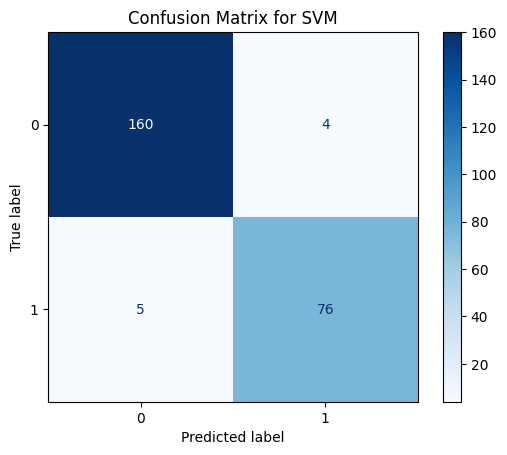

Accuracy score of train SVM: 96.69603524229075
Accuracy score of test SVM: 96.3265306122449


In [36]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Train the SVM classifier
classifier = SVC(kernel='linear', random_state=0)
trained_model = classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm_SVM = confusion_matrix(y_test, y_pred)

# Display the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_SVM)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for SVM")
plt.show()

# Print accuracy scores
print("Accuracy score of train SVM:", accuracy_score(y_train, trained_model.predict(X_train)) * 100)
print("Accuracy score of test SVM:", accuracy_score(y_test, y_pred) * 100)
